In [10]:
import pandas as pd
import numpy as np
import kmeans
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.colors import ListedColormap

raw_dataset = pd.read_csv('./basic-session-reports-bbs.csv')
print(raw_dataset.head())

         Session Start Length      Site    Game             Stake     Table  \
0  2023/10/10 10:03 pm   0:16  Ignition  Holdem  $0.05 NL (6 max)  30634995   
1  2023/10/10  9:53 pm   0:26  Ignition  Holdem  $0.05 NL (6 max)  30639072   
2  2023/10/10  9:49 pm   0:30  Ignition  Holdem  $0.05 NL (6 max)  30634850   
3  2023/10/10  8:51 pm   0:38  Ignition  Holdem  $0.05 NL (6 max)  30637811   
4  2023/10/10  8:50 pm   0:39  Ignition  Holdem  $0.05 NL (6 max)  30634850   

   Hands My C Won Raise First PF Squeeze  ... Donk T 2Bet R Call R CBet  \
0     21    $1.45       40.00       0.00  ...      -   0.00           -   
1     27  -$14.43        0.00      25.00  ...   0.00      -           -   
2     31   -$2.80       18.75       0.00  ...   0.00   0.00           -   
3     36   -$2.36       33.33       0.00  ...   0.00      -           -   
4     41   -$0.77       33.33       0.00  ...   0.00   0.00           -   

  CBet R Donk R Probe R River AFq Turn AFq     BB/100 All-In Adj BB/100  


In [2]:
c_won = raw_dataset['My C Won']

float_c_won = c_won.copy()
for i in range(len(float_c_won)):
    yeet = float(float_c_won[i].replace("$", "")) 
    float_c_won[i] = yeet

print(float_c_won.sum())


72.56000000000004


In [4]:
c_won = raw_dataset['All-In Adj BB/100']

all_in_adj_bb_100 = c_won.copy()
for i in range(len(float_c_won)):
    if "-" in all_in_adj_bb_100[i]:
        yeet = float(all_in_adj_bb_100[i].replace(",", ""))
    else:
        yeet = float(all_in_adj_bb_100[i])
    all_in_adj_bb_100[i] = yeet

print(all_in_adj_bb_100.std())


193.73591902916723


In [33]:
session_times = raw_dataset['Session Start']
session_datetime_objs = session_times.copy()

for i in range(len(session_datetime_objs)):
    datetime_obj = datetime.strptime(session_times[i], "%Y/%m/%d %H:%M %p")
    hr_pl_m = datetime_obj.hour + datetime_obj.minute*.225
    session_datetime_objs[i] = hr_pl_m

print(min(session_datetime_objs), max(session_datetime_objs))

1.45 23.925


In [21]:
hands = raw_dataset['Hands']

int_hands = hands.copy()
for i in range(len(int_hands)):
    yeet = int(int_hands[i]) 
    int_hands[i] = yeet

print(int_hands.sum())

8774


In [15]:
session_length = raw_dataset['Length']
sl_m = session_length.copy()

for i in range(len(sl_m)):
    s_v = sl_m[i].split(':')
    sl_m[i] = (int(s_v[0])*60) + int(s_v[1])

print(sl_m.head())


0    16
1    26
2    30
3    38
4    39
Name: Length, dtype: object


In [34]:
# Format x, y into X for visualization
X = np.array([[float_c_won[i], session_datetime_objs[i]] for i in range(len(session_datetime_objs))])

print(X.shape)

(140, 2)


K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


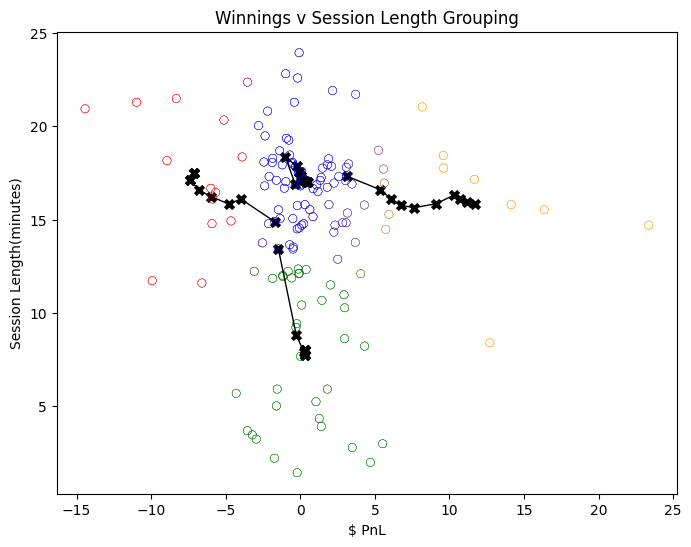

In [36]:
K = 4
max_iters = 10
init_centroids = kmeans.kMeans_init_centroids(X, K)
centroids, idx, plot_history = kmeans.run_kMeans(X, init_centroids, plot_progress=True)

In [5]:
# Multiple K-means
K = 4
max_iters = 10
init_centroid_history = []
k_means_history = []
for i in range(max_iters):
    init_centroids = kmeans.kMeans_init_centroids(X, K)
    centroids, idx, plot_history = kmeans.run_kMeans(X, init_centroids, plot_progress=False)
    init_centroid_history.append(init_centroids)
    k_means_history.append(plot_history)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

10


<Figure size 800x600 with 0 Axes>

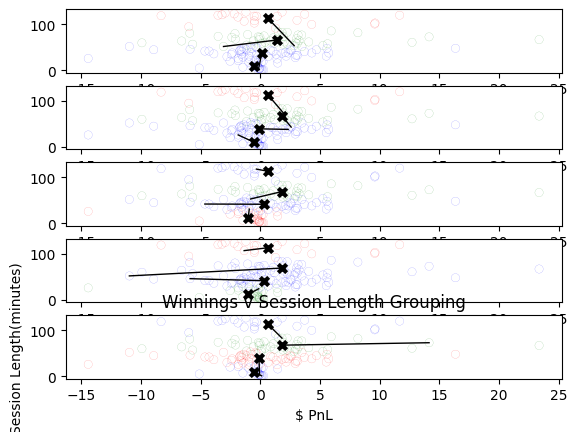

In [6]:
kmeans.plot_kmeans_subplot(k_means_history)

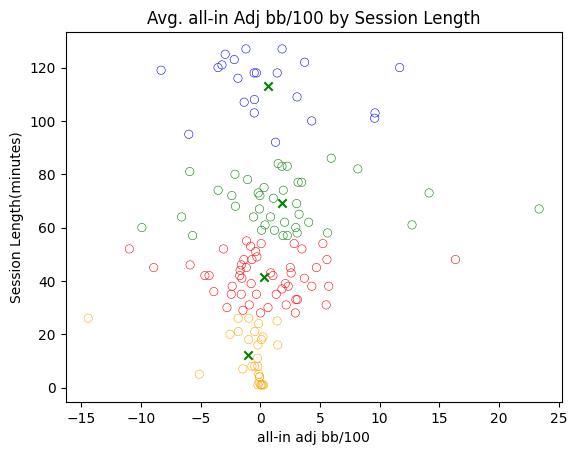

In [22]:
cmap = ListedColormap(["green", "blue", "red", "orange"])
c = cmap(idx)
plt.scatter(X[:,0], X[:,1], facecolors='none', edgecolors=c, linewidth=0.4, alpha=1)
plt.scatter(centroids[:,0], centroids[:,1], c="g", marker='x')
plt.title("Avg. all-in Adj bb/100 by Session Length")
plt.xlabel("all-in adj bb/100")
plt.ylabel("Session Length(minutes)")
plt.show()

In [21]:
# centroids[:,0]
print(centroids)

[[  1.8025641   69.07692308]
 [  0.63181818 113.27272727]
 [  0.33176471  41.50980392]
 [ -1.02        12.25      ]]


In [3]:
total_afq = raw_dataset['Total AFq']
float_pafq = total_afq.copy()

for i in range(len(float_pafq)):
    yeet = 0.0
    if float_pafq[i] != "-":
        yeet = float(float_pafq[i]) 
    
    float_pafq[i] = yeet

print(float_pafq.head())

0     50.0
1    71.43
2    36.36
3    33.33
4    41.18
Name: Total AFq, dtype: object


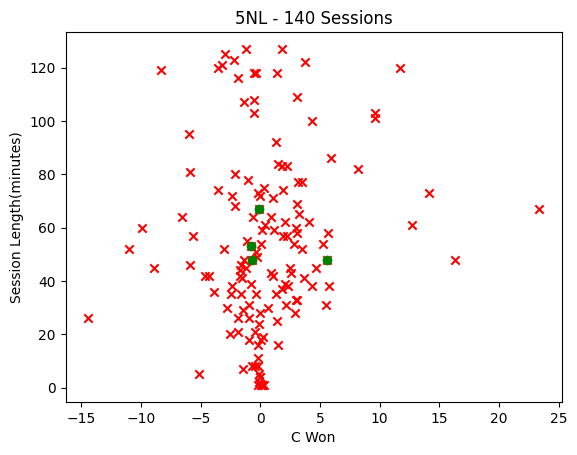

In [11]:
plt.scatter(float_c_won, sl_m, marker='x', color='r')
plt.scatter(init_centroids[:,0], init_centroids[:,1], marker='o', c='g')
plt.title('5NL - 140 Sessions')
plt.xlabel('C Won')
plt.ylabel('Session Length(minutes)')
plt.show()

In [13]:
# hmm lets normallize this a bit since it's so close anyways
float_c_won, float_pafq

lfloat_c = float_c_won.copy()

for i in range(len(lfloat_c)):
    yeet = 0.0
    if lfloat_c[i] != "-":
        yeet = float(lfloat_c[i])
    print(yeet, type(yeet))
    # lfloat_c[i] = np.log(yeet)

print(lfloat_c.head())

0.371563556432483 <class 'numpy.float64'>
nan <class 'numpy.float64'>
nan <class 'numpy.float64'>
nan <class 'numpy.float64'>
nan <class 'numpy.float64'>
nan <class 'numpy.float64'>
0.3987761199573678 <class 'numpy.float64'>
0.9477893989335261 <class 'numpy.float64'>
nan <class 'numpy.float64'>
1.091923300517313 <class 'numpy.float64'>
nan <class 'numpy.float64'>
nan <class 'numpy.float64'>
1.4586150226995167 <class 'numpy.float64'>
nan <class 'numpy.float64'>
nan <class 'numpy.float64'>
1.547562508716013 <class 'numpy.float64'>
nan <class 'numpy.float64'>
-0.15082288973458366 <class 'numpy.float64'>
nan <class 'numpy.float64'>
2.7942278973432626 <class 'numpy.float64'>
nan <class 'numpy.float64'>
0.7371640659767196 <class 'numpy.float64'>
nan <class 'numpy.float64'>
nan <class 'numpy.float64'>
nan <class 'numpy.float64'>
nan <class 'numpy.float64'>
0.7080357930536959 <class 'numpy.float64'>
nan <class 'numpy.float64'>
1.7817091333745536 <class 'numpy.float64'>
nan <class 'numpy.float6

C:\Users\noahe\AppData\Local\Temp\ipykernel_18416\739516801.py:9: RuntimeWarning: invalid value encountered in log
  yeet = np.log(float(lfloat_c[i]))


In [2]:
rows = raw_dataset.columns

for i in rows:
    print(i)


Session Start
Length
Site
Game
Stake
Table
Hands
My C Won
Raise First
PF Squeeze
Limp/Raise
Limp/Call
PF AFq
CC 2Bet PF
Call Steal
3Bet PF
3Bet Steal
2Bet T
Call T 2Bet
CBet T
Donk T
2Bet R
Call R CBet
CBet R
Donk R
Probe R
River AFq
Turn AFq
Total AFq
